# Project Name:- Artificial Intelligence January Major Project
## Project Title:- Hand Sign Language Prediction
### Problem Statement:- Create a Deep learning model to predict the different hand signs images.<br>

Submitted by<br>
<b>Anannya P. Neog</b>

#### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
X = np.load("X.npy")
y = np.load("Y.npy")

print(X.shape)
print(y.shape)

(2062, 64, 64)
(2062, 10)


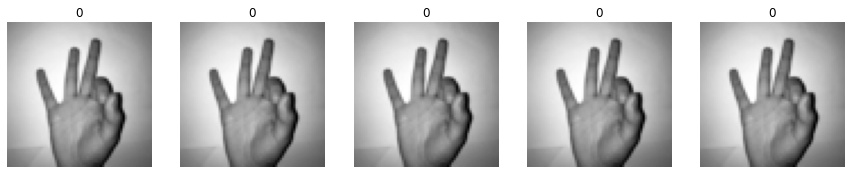

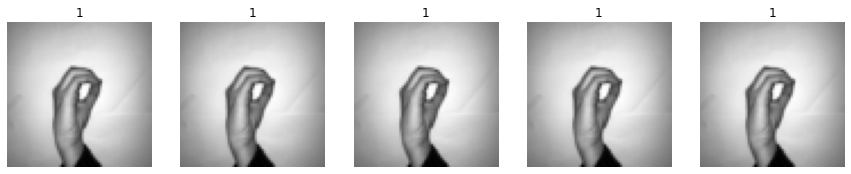

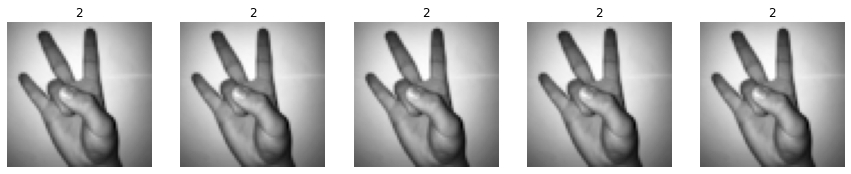

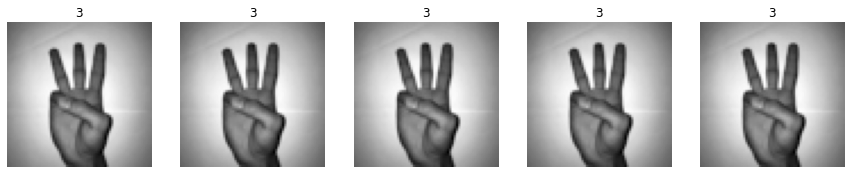

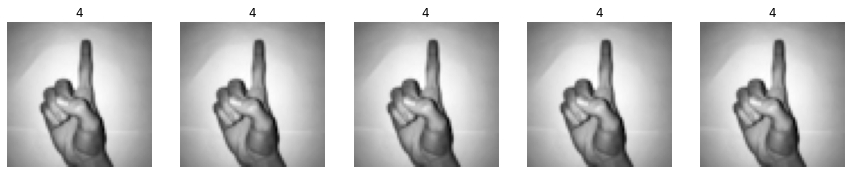

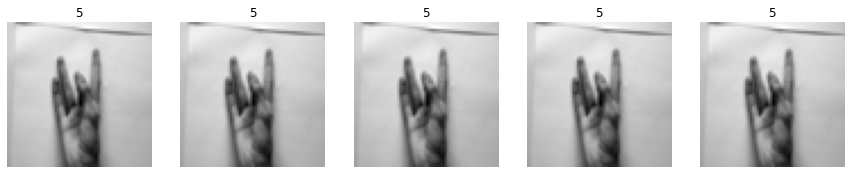

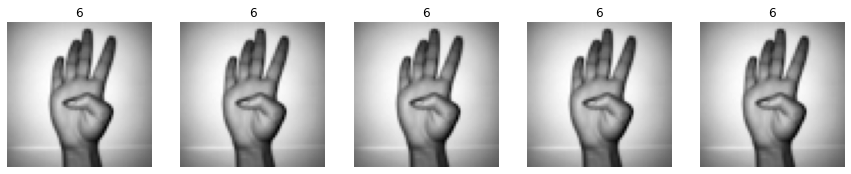

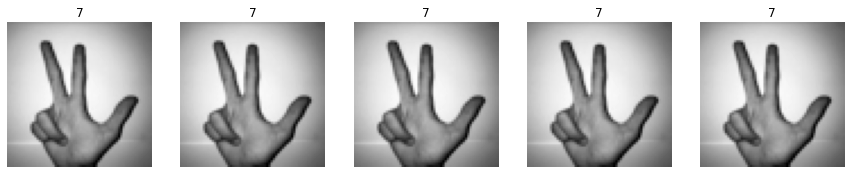

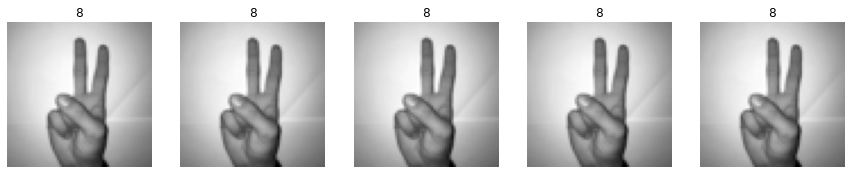

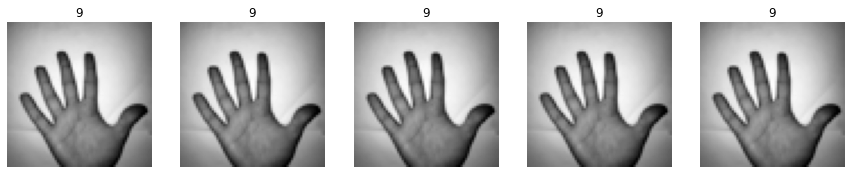

In [3]:
for number, i in zip(range(11), range(100, 2000, 200)):
    fig, axes = plt.subplots(1, 5, figsize=(15, 12))
    for ax in axes:
        ax.imshow(X[i].reshape(64, 64), cmap="gray")
        ax.set_title(number)
        ax.axis("off")
    plt.show()

The actual mapping is:<br>

- Number 0 - Label 1<br>
- Number 1 - Label 4<br>
- Number 2 - Label 8<br>
- Number 3 - Label 7<br>
- Number 4 - Label 6<br>
- Number 5 - Label 9<br>
- Number 6 - Label 3<br>
- Number 7 - Label 2<br>
- Number 8 - Label 5<br>
- Number 9 - Label 0<br>

In [4]:
label_to_digit = {
    1: 0,
    4: 1,
    8: 2,
    7: 3,
    6: 4,
    9: 5,
    3: 6,
    2: 7,
    5: 8,
    0: 9,
}

These are the actual digits displayed in the images:

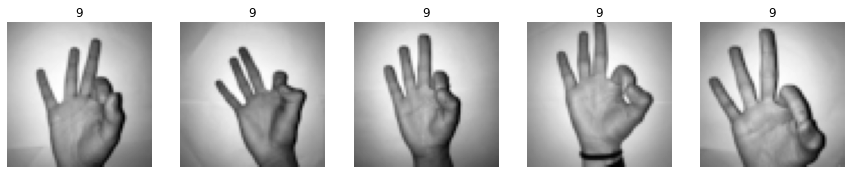

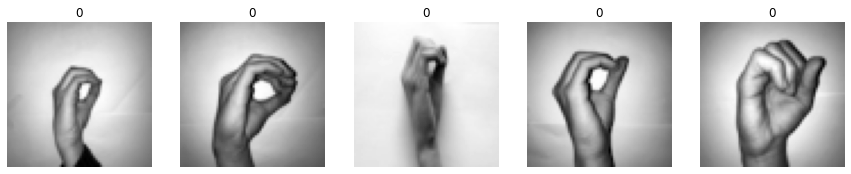

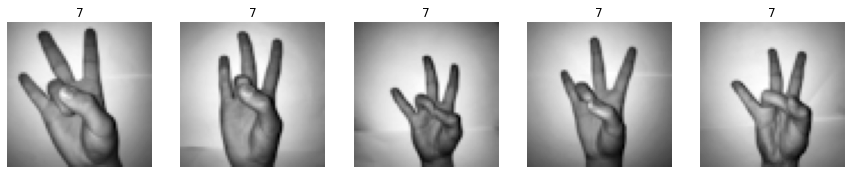

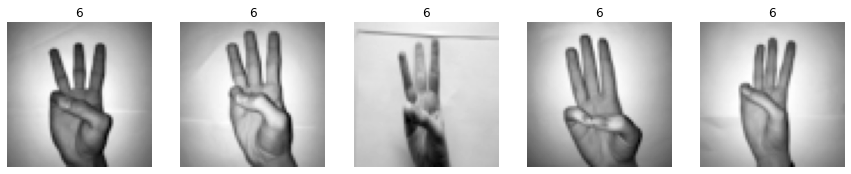

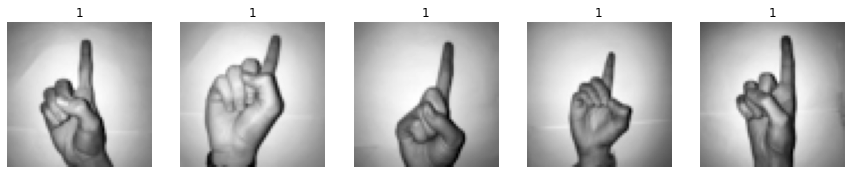

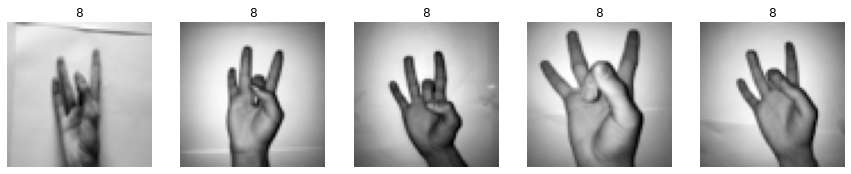

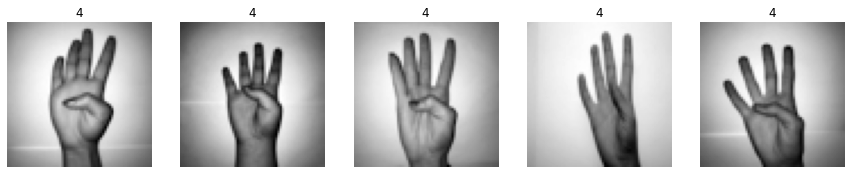

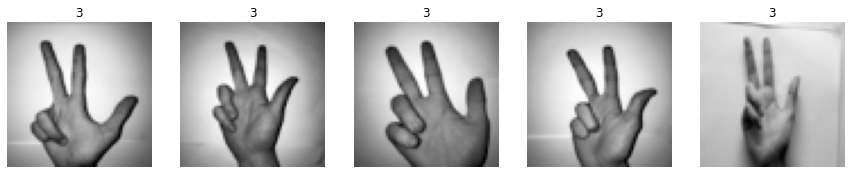

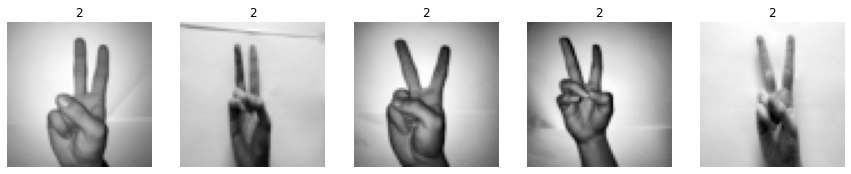

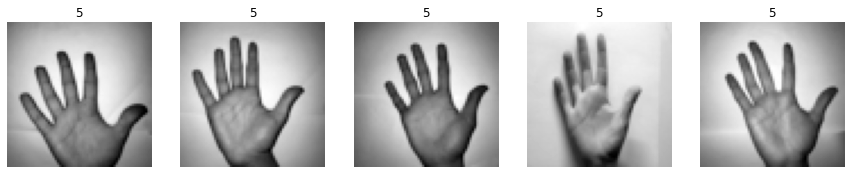

In [5]:
for label, i in zip(range(0, 10), range(100, 2000, 200)):
    fig, axes = plt.subplots(1, 5, figsize=(15, 12))
    for j, ax in enumerate(axes):
        ax.imshow(X[i + j].reshape(64, 64), cmap="gray")
        digit = label_to_digit[label]
        ax.set_title(digit)
        ax.axis("off")
    plt.show()

Text(0.5, 1.0, 'Destribution of digits in sign language dataset')

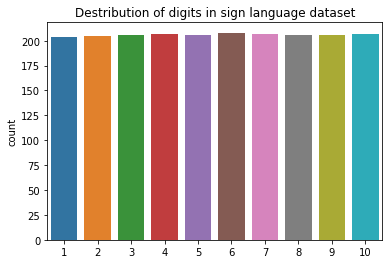

In [6]:
indexes = [res.tolist().index(1.) + 1 for res in y]
sns.countplot(x=indexes).set_title("Destribution of digits in sign language dataset")

## Classify Images to Numbers (CNN)
### Train/Test Split (80/20)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100, shuffle=True)

x_train= X_train.reshape(-1,64,64,1)
x_test= X_test.reshape(-1,64,64,1)

print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (1649, 64, 64, 1)
x_test (413, 64, 64, 1)
y_train (1649, 10)
y_test (413, 10)


### CNN Architecture

In [8]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(64, 64, 1)),
    keras.layers.Conv2D(32, kernel_size=3, activation="relu", strides=1, padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding='same', strides=1),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, kernel_size=3, activation="relu", padding='same', strides=1),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation="softmax"),
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

### Data Augmentation

I performed the following data augmentation operations:<br>

 1) Randomly rotate images in the range 5 degrees<br>
 2) Randomly zoom image by 20%<br>
 3) Randomly shift images horizontally by 10%<br>
 4) Randomly shift images vertically 10%<br>

In [9]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

datagen.fit(x_train)

### Train Model

In [10]:
epochs=50
batch_size=32
validation_size = int(len(y_train) * 0.1)

history = model.fit_generator(datagen.flow(x_train[validation_size:] ,y_train[validation_size:], batch_size=batch_size),
                              validation_data = (x_train[:validation_size],y_train[:validation_size]),
                              epochs = epochs)

Epoch 1/50
47/47 [==============================] - 13s 227ms/step - loss: 2.3130 - accuracy: 0.0909 - val_loss: 2.3033 - val_accuracy: 0.0854
Epoch 2/50
47/47 [==============================] - 10s 212ms/step - loss: 2.3026 - accuracy: 0.0936 - val_loss: 2.3042 - val_accuracy: 0.0854
Epoch 3/50
47/47 [==============================] - 10s 204ms/step - loss: 2.3022 - accuracy: 0.1064 - val_loss: 2.3038 - val_accuracy: 0.0854
Epoch 4/50
47/47 [==============================] - 11s 226ms/step - loss: 2.2923 - accuracy: 0.1340 - val_loss: 2.2088 - val_accuracy: 0.3232
Epoch 5/50
47/47 [==============================] - 10s 207ms/step - loss: 1.8756 - accuracy: 0.3199 - val_loss: 1.2165 - val_accuracy: 0.5732
Epoch 6/50
47/47 [==============================] - 11s 227ms/step - loss: 1.3921 - accuracy: 0.5226 - val_loss: 0.9094 - val_accuracy: 0.7439
Epoch 7/50
47/47 [==============================] - 10s 216ms/step - loss: 1.1297 - accuracy: 0.6128 - val_loss: 0.6528 - val_accuracy: 0.8171

## Results & Evaluation
### Visualize Training Process

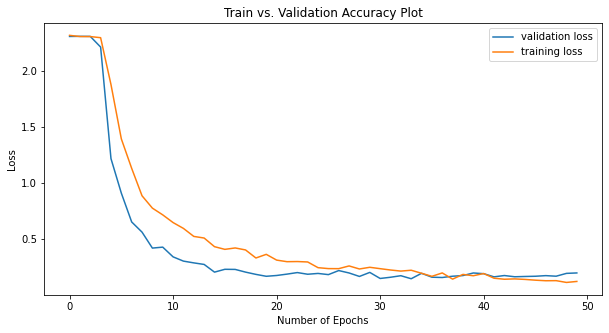

In [11]:
plt.figure(figsize = (10,5))
plt.plot(history.history['val_loss'], label="validation loss")
plt.plot(history.history['loss'], label="training loss")
plt.title("Train vs. Validation Accuracy Plot")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

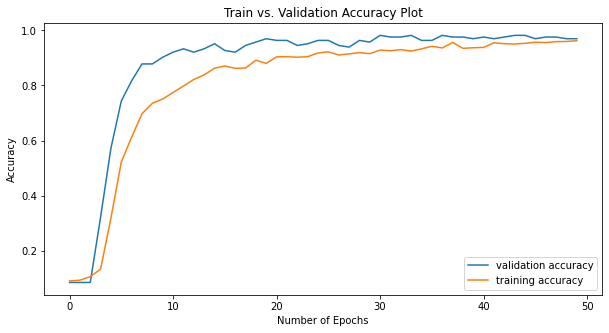

In [12]:
plt.figure(figsize = (10,5))
plt.plot(history.history['val_accuracy'], label="validation accuracy")
plt.plot(history.history['accuracy'], label="training accuracy")
plt.title("Train vs. Validation Accuracy Plot")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Model Classification Performance

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Train Accuracy
y_predict = [res.tolist().index(max(res)) for res in model.predict(x_train)]
y_train = [res.tolist().index(1.) for res in y_train]
print(f"Train Accuracy: {accuracy_score(y_train, y_predict)}")

# Test Accuracy
y_predict = [res.tolist().index(max(res)) for res in model.predict(x_test)]
y_test = [res.tolist().index(1.) for res in y_test]
print(f"Test Accuracy: {accuracy_score(y_test, y_predict)}")

Train Accuracy: 0.9957550030321407
Test Accuracy: 0.9733656174334141


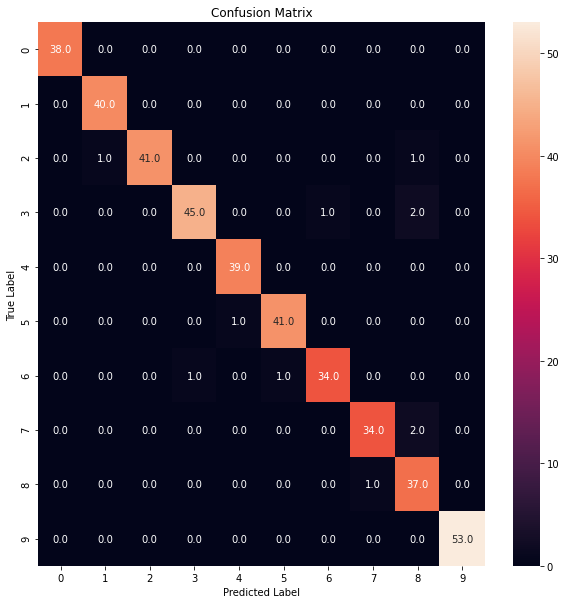

In [14]:
confusion_mtx = confusion_matrix(y_test, y_predict) 
plt.figure(figsize = (10,10))
sns.heatmap(confusion_mtx, annot=True,fmt= '.1f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Examine Misclassified Data

Total of 11 images:

Image #32
Classified: 0
Actual: 7


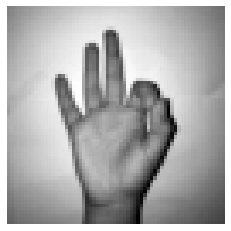



Image #40
Classified: 2
Actual: 7


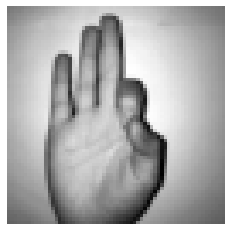



Image #62
Classified: 2
Actual: 6


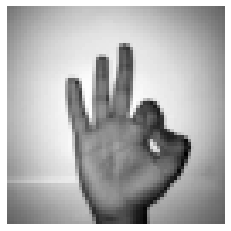



Image #131
Classified: 3
Actual: 2


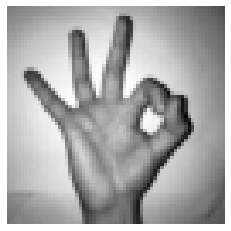



Image #186
Classified: 2
Actual: 3


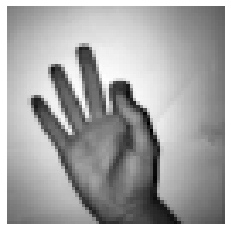



Image #215
Classified: 8
Actual: 4


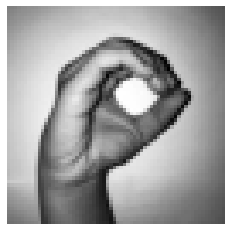



Image #217
Classified: 2
Actual: 6


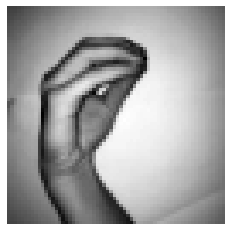



Image #229
Classified: 1
Actual: 8


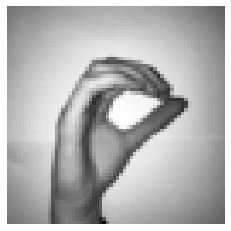



Image #241
Classified: 4
Actual: 6


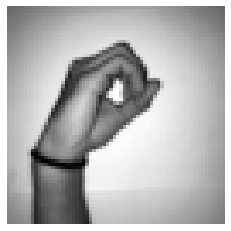



Image #368
Classified: 6
Actual: 4


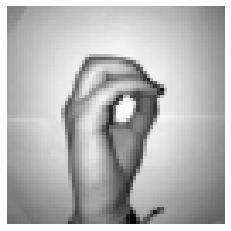



Image #378
Classified: 2
Actual: 3


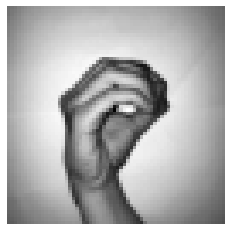

In [15]:
misclassified = [i for i, (expected, actual) in enumerate(zip(y_test, y_predict)) if expected != actual]

print(f"Total of {len(misclassified)} images:\n")
for i in misclassified:
    print(f"Image #{i}")
    print(f"Classified: {label_to_digit[y_predict[i]]}")
    print(f"Actual: {label_to_digit[y_test[i]]}")
    plt.imshow(X[i + j].reshape(64, 64), cmap="gray")
    plt.axis("off")
    plt.show()
    print("\n")

By looking at the misclassified images, one can notice that <b>almost all these images have wrong label in the dataset.</b>

 - <b>Images 90, 131, 186:</b> display number 9, but are labeled each with different labels. The model managed to identify number 90 correctly, but classified the other two images wrong.
 - <b>Images 241, 373, 378, 403:</b> display the number 0, while the last 3 are labeled with incorrect labels. The model misclassiffied all 3.

### Conclusion

As mentioned, some of the images in the dataset turned out to be labeled wrong. I noticed 6 such images which the model misclassified, but there might be more such images. Such inaccuracies may lead to a model whose accuracy on the task may not be as high as one can expect. Overall the the trained model is highly accurate 98% accuracy rates on the test set.